In [14]:
#based on https://github.com/amrap030/c2d-marketplace/blob/main/benchmarks/benchmarks.ipynb


In [3]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

# Schritt 1: Datei einlesen

use_case = ["Voting", "Marketplace", "DeFi"]
value_checks = ["2","4","6","8"]
value_checks1 = ("2","4","6","8")

root_path = "../Benchmark/"
file_path_voting = "../Benchmark/Voting/results/result_formated.txt"
df_voting = pd.read_csv(file_path_voting, delimiter=',', header=0)

df_voting.replace(r'^\s*$', float('NaN'), regex=True, inplace=True)

# Schritt 4: Werte extrahieren
constraints_voting = df_voting["constraints"]
gas_voting = df_voting["gas_call"]
witness_voting= df_voting["witness_s"]
setup_voting = df_voting["setup_s"]
proof_generation_voting = df_voting["proof_s"]
compiled_pp_voting = df_voting["compiled_size"]
proving_key_voting = df_voting["proving_key_size"]
verification_key_voting = df_voting["verification_key_size"]




file_path_DeFi = "../Benchmark/DeFi/results/result_formated.txt"
df_DeFi = pd.read_csv(file_path_DeFi, delimiter=',', header=0)

df_DeFi.replace(r'^\s*$', float('NaN'), regex=True, inplace=True)

# Schritt 4: Werte extrahieren
constraints_DeFi = df_DeFi["constraints"]
gas_DeFi = df_DeFi["gas_call"]
witness_DeFi = df_DeFi["witness_s"]
setup_DeFi = df_DeFi["setup_s"]
proof_generation_DeFi = df_DeFi["proof_s"]
compiled_pp_DeFi = df_DeFi["compiled_size"]
proving_key_DeFi = df_DeFi["proving_key_size"]
verification_key_DeFi = df_DeFi["verification_key_size"]


file_path_Marketplace = "../Benchmark/Marketplace/results/result_formated.txt"
df_Marketplace = pd.read_csv(file_path_Marketplace, delimiter=',', header=0)

df_Marketplace.replace(r'^\s*$', float('NaN'), regex=True, inplace=True)

# Schritt 4: Werte extrahieren
constraints_Marketplace  = df_Marketplace["constraints"]
gas_Marketplace  = df_Marketplace ["gas_call"]
witness_Marketplace  = df_Marketplace ["witness_s"]
setup_Marketplace  = df_Marketplace ["setup_s"]
proof_generation_Marketplace  = df_Marketplace ["proof_s"]
compiled_pp_Marketplace  = df_Marketplace ["compiled_size"]
proving_key_Marketplace  = df_Marketplace ["proving_key_size"]
verification_key_Marketplace  = df_Marketplace ["verification_key_size"]

#print(df_Marketplace, "\n" ,df_voting, "\n", df_DeFi)






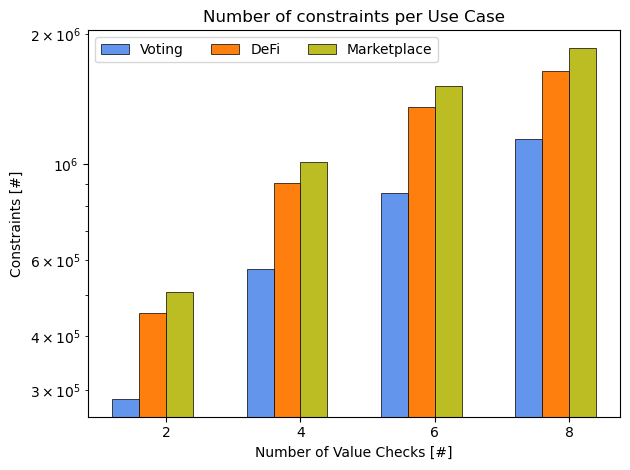

In [42]:
#!pip install --upgrade matplotlib --user
#!conda install matplotlib 
#!conda update -n base -c defaults conda
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

constraints_dic = {
    'Voting': (constraints_voting),
    'DeFi': (constraints_DeFi),
    'Marketplace': (constraints_Marketplace)
}

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in constraints_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constraints [#]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Number of constraints per Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("constraints.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





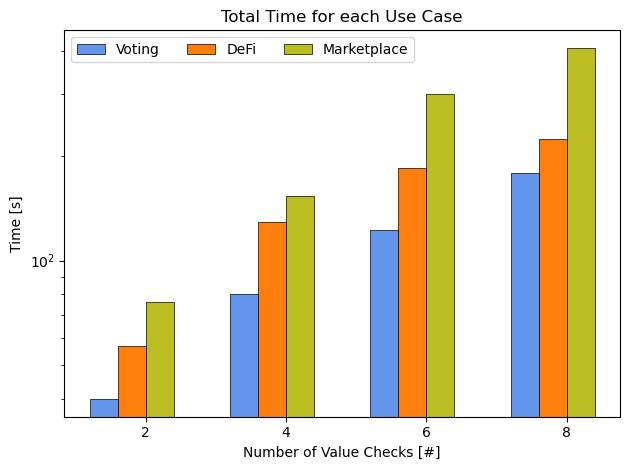

In [43]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

voting_time_sum = witness_voting + setup_voting + proof_generation_voting
DeFi_time_sum = witness_DeFi + setup_DeFi + proof_generation_DeFi
Marketplace_time_sum = witness_Marketplace + setup_Marketplace + proof_generation_Marketplace

Time_dic = {
    'Voting': (voting_time_sum),
    'DeFi': (DeFi_time_sum),
    'Marketplace': (Marketplace_time_sum)
}

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in Time_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Total Time for each Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("time_combined.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





{'Voting': 0    0.789
1    1.600
2    2.400
3    3.200
Name: compiled_size, dtype: float64, 'DeFi': 0    1.2
1    2.3
2    3.4
3    4.2
Name: compiled_size, dtype: float64, 'Marketplace': 0    1.7
1    3.3
2    5.0
3    6.2
Name: compiled_size, dtype: float64}


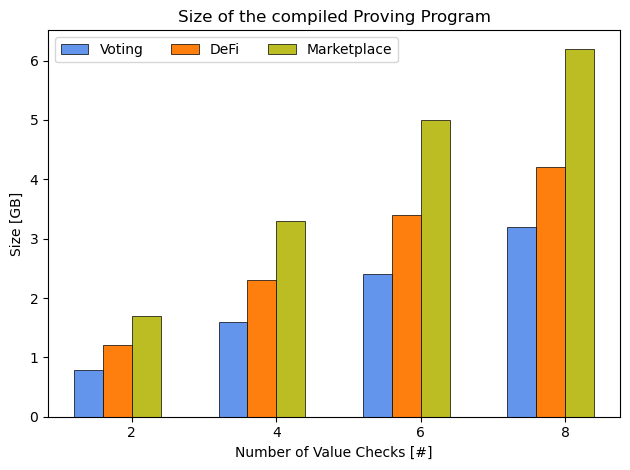

In [45]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np


comp_PP_dic = {
    'Voting': (compiled_pp_voting),
    'DeFi': (compiled_pp_DeFi),
    'Marketplace': (compiled_pp_Marketplace)
}

print(comp_PP_dic)


#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in comp_PP_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size [GB]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Size of the compiled Proving Program')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
#ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("comp_pp.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





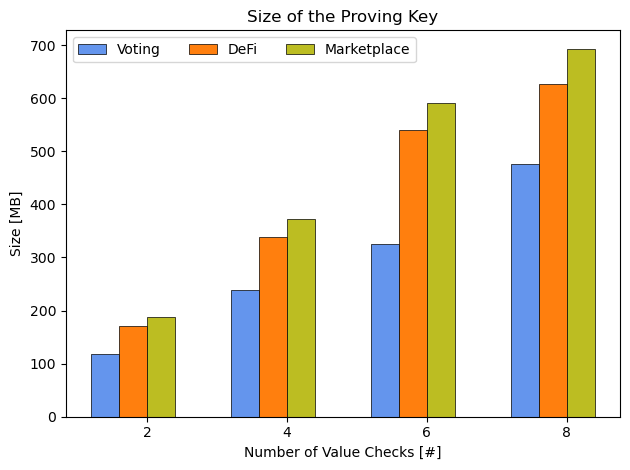

In [4]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np


Proving_Key_dic = {
    'Voting': (proving_key_voting),
    'DeFi': (proving_key_DeFi),
    'Marketplace': (proving_key_Marketplace)
}

#print(comp_PP_dic)


#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in Proving_Key_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size [MB]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Size of the Proving Key')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
#ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("provingKey.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





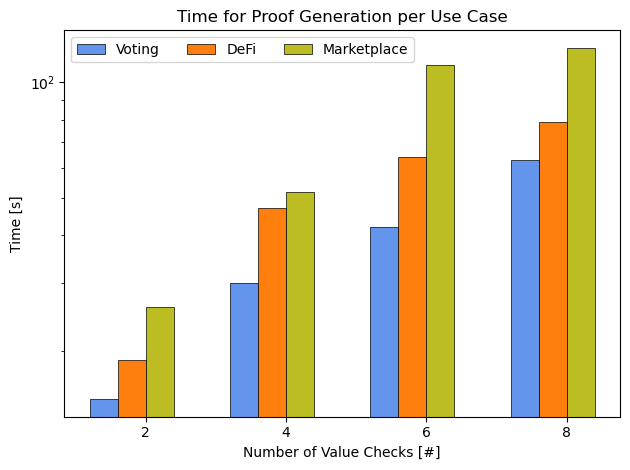

In [47]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np



Time_Proof_Gen_dic = {
    'Voting': (proof_generation_voting),
    'DeFi': (proof_generation_DeFi),
    'Marketplace': (proof_generation_Marketplace)
}

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in Time_Proof_Gen_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Time for Proof Generation per Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("time_proof_generation.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





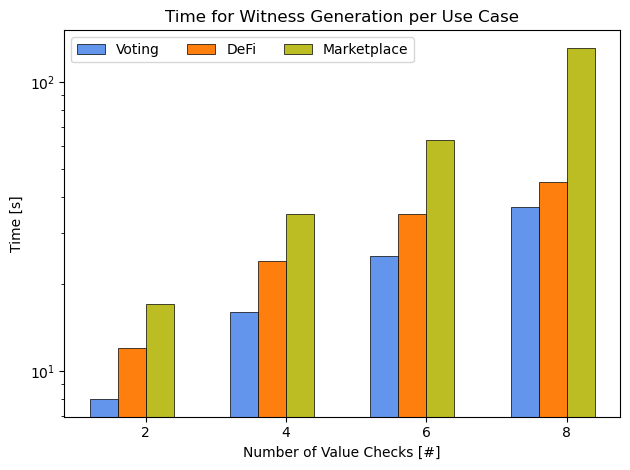

In [48]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np



Time_witness_dic = {
    'Voting': (witness_voting),
    'DeFi': (witness_DeFi),
    'Marketplace': (witness_Marketplace)
}

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in Time_witness_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Time for Witness Generation per Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("time_witness.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





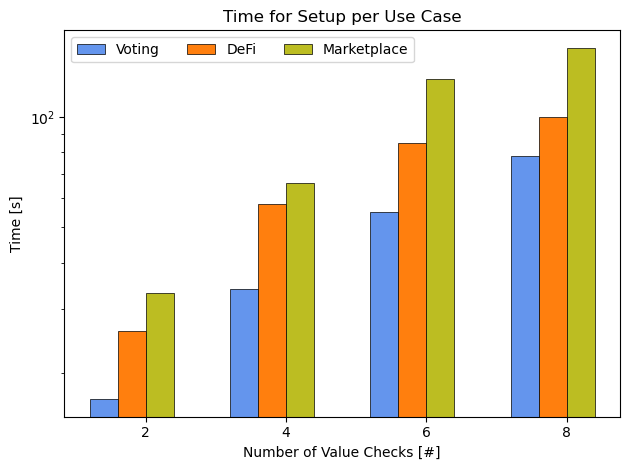

In [49]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np



Time_setup_dic = {
    'Voting': (setup_voting),
    'DeFi': (setup_DeFi),
    'Marketplace': (setup_Marketplace)
}

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in Time_setup_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Time for Setup per Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("time_setup.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





In [50]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

path = "../Benchmark/{}/{}/results/{}.txt"
use_case = ["Voting", "DeFi", "Marketplace"]
value_checks = ["2","4","6","8"]
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []

#measurements = ["compilation", "witness", "setup", "proof"]
measurements = ["proof1"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index2, usecase in enumerate(use_case):
            
        for index, val_checks in enumerate(value_checks):
            df1 = pd.read_csv(path.format(usecase,val_checks , measure), header=None)
            #print(df1)
            
    
            max1 = round(np.max(df1[1] * 1.024e-6),3)
            avg1 = round(np.average(df1[1] * 1.024e-6),3)

            print(max1)

            
            max_all.append(max1)
            avg_all.append(avg1)


max_memory_proof_voting =  max_all[:4]
max_memory_proof_DeFi = max_all[4:8]
max_memory_proof_Marketplace = max_all[8:]

avg_memory_proof_voting =  avg_all[:4]
avg_memory_proof_DeFi = avg_all[4:8]
avg_memory_proof_Marketplace = avg_all[8:]

#print(max_memory_proof_voting, max_memory_proof_DeFi, max_memory_proof_Marketplace)
    




1.459
2.916
4.307
5.869
2.123
4.336
6.571
7.94
2.821
5.635
8.506
10.535


{'Voting': [1.459, 2.916, 4.307, 5.869], 'DeFi': [2.123, 4.336, 6.571, 7.94], 'Marketplace': [2.821, 5.635, 8.506, 10.535]}


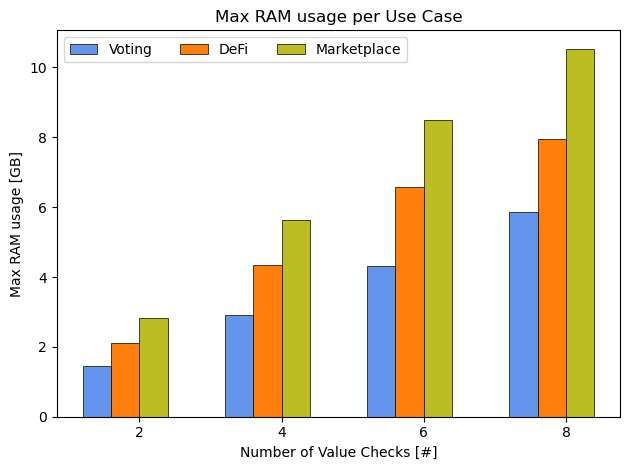

In [65]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

value_checks1 = ("2","4","6","8")

max_RAM_proofG_dic = {
    'Voting': (max_memory_proof_voting),
    'DeFi': (max_memory_proof_DeFi),
    'Marketplace': (max_memory_proof_Marketplace)
}
print(max_RAM_proofG_dic)

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in max_RAM_proofG_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Max RAM usage [GB]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Max RAM usage per Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
#ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("max_ram.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





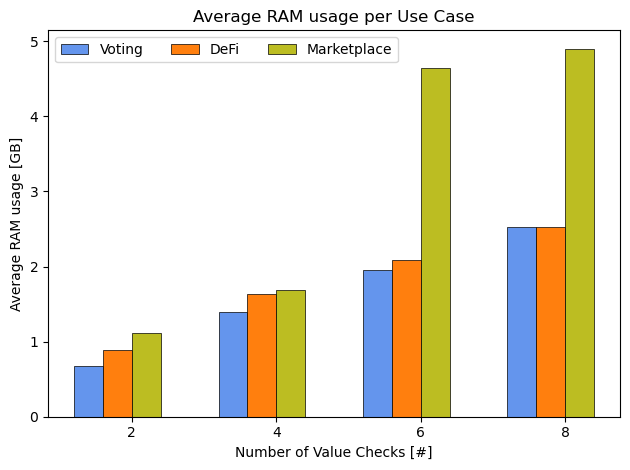

In [52]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

value_checks1 = ("2","4","6","8")

avg_RAM_proofG_dic = {
    'Voting': (avg_memory_proof_voting),
    'DeFi': (avg_memory_proof_DeFi),
    'Marketplace': (avg_memory_proof_Marketplace)
}

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in avg_RAM_proofG_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average RAM usage [GB]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Average RAM usage per Use Case')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
#ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

with PdfPages("avg_ram.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





{'Voting': 0     740426.0
1    1214480.0
2          NaN
3          NaN
Name: gas_call, dtype: float64, 'DeFi': 0     731727.0
1    1206075.0
2          NaN
3          NaN
Name: gas_call, dtype: float64, 'Marketplace': 0    858769.0
1         NaN
2         NaN
3         NaN
Name: gas_call, dtype: float64}


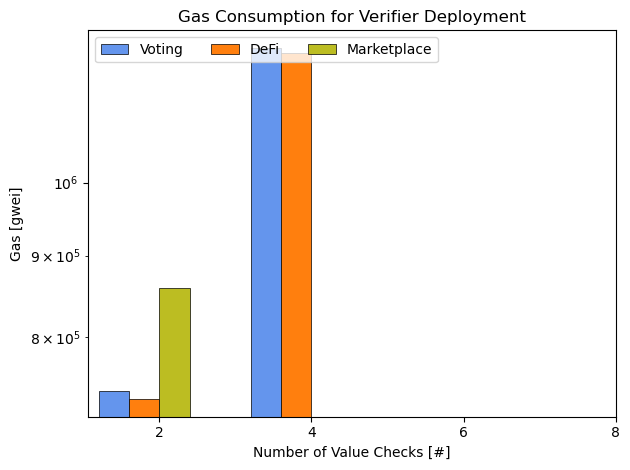

In [53]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

value_checks1 = ("2","4","6","8")

gas_dic = {
    'Voting': (gas_voting),
    'DeFi': (gas_DeFi),
    'Marketplace': (gas_Marketplace)
}

print(gas_dic)

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in gas_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gas [gwei]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Gas Consumption for Verifier Deployment')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

# Add a red horizontal line for limit
#ax.axhline(y=15000000, color='red', linestyle='--', linewidth=1.5)

with PdfPages("gas_deployment.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





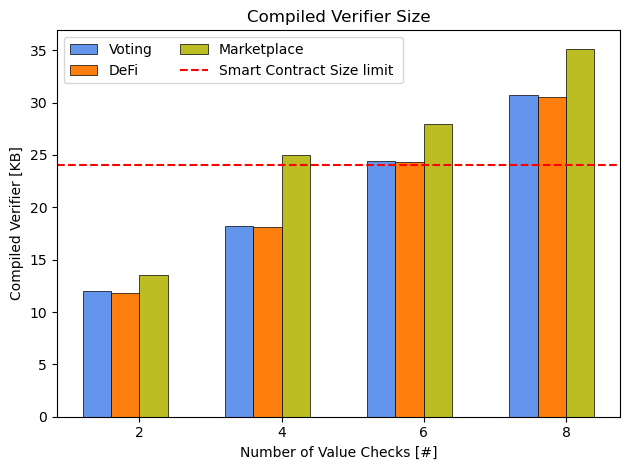

In [55]:
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

value_checks1 = ("2","4","6","8")

compiled_verifier_voting = [11.982,18.218, 24.456, 30.696]
compiled_verifier_DeFi = [11.861, 18.098, 24.337, 30.578]
compiled_verifier_Marketplace = [13.543, 24.956, 27.979, 35.143]

comp_verifier_dic = {
    'Voting': (compiled_verifier_voting),
    'DeFi': (compiled_verifier_DeFi),
    'Marketplace': (compiled_verifier_Marketplace)
}

#print(gas_dic)

#print(constraints_dic)
#print("Matplotlib Version:", matplotlib.__version__)

x = np.arange(len(value_checks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()


colors = ["cornflowerblue", "tab:orange", "tab:olive"]

i = 0
for attribute, measurement in comp_verifier_dic.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, linewidth=0.5, edgecolor='black', color=colors[i])
    multiplier += 1
    i += 1

    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Compiled Verifier [KB]')
ax.set_xlabel('Number of Value Checks [#]')
ax.set_title('Compiled Verifier Size')
ax.set_xticks(x + 1.5* width, value_checks1)
#ax.set_xticks(x + width, species)
#ax.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=3)
#ax.set_yscale('log')
#ax.set_ylim(0, 250)

# Adjust layout to be constrained
fig.tight_layout()

# Add a red horizontal line for limit
line = ax.axhline(y=24.000, color='red', linestyle='--', linewidth=1.5)

# Create custom legend
handles, labels = ax.get_legend_handles_labels()
handles.append(line)
labels.append('Smart Contract Size limit ')

ax.legend(handles, labels, bbox_to_anchor=(0, 1), loc='upper left', ncol=2)

with PdfPages("compiled_verifier.pdf") as pdf:        
    pdf.savefig(bbox_inches="tight")
    plt.show()





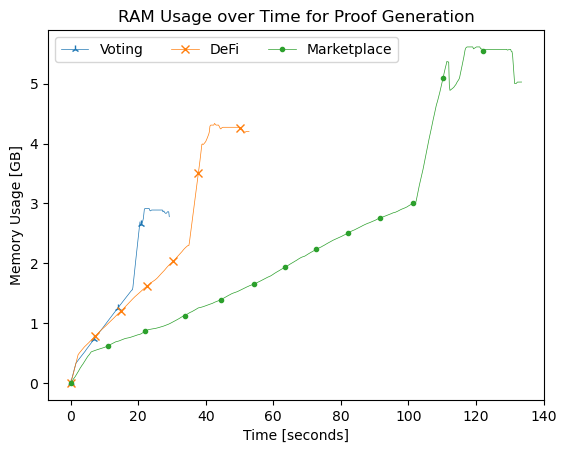

In [56]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


path = "../Benchmark/{}/{}/results/{}_formated.txt"
use_case = ["Voting", "DeFi", "Marketplace"]
value_checks = ["2","4","6","8"]


max_all = []
avg_all = []

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [GB]")

#measurements = ["compilation", "witness", "setup", "proof"]
measurements = ["proof1"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index2, usecase in enumerate(use_case):
            

        df1 = pd.read_csv(path.format(usecase,4 , measure), header=None)
        time = df1[0]
        memory = round(df1[1] * 1024,3)

        plt.plot([t/1000 for t in time], memory*1e-9, linestyle="-", marker=marker[index2], linewidth=0.5, markevery=50, label=usecase)


with PdfPages("Memory_proof_gen_overtime_4.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncols=3)
    plt.title('RAM Usage over Time for Proof Generation')
    pdf.savefig(bbox_inches="tight")
    plt.show()

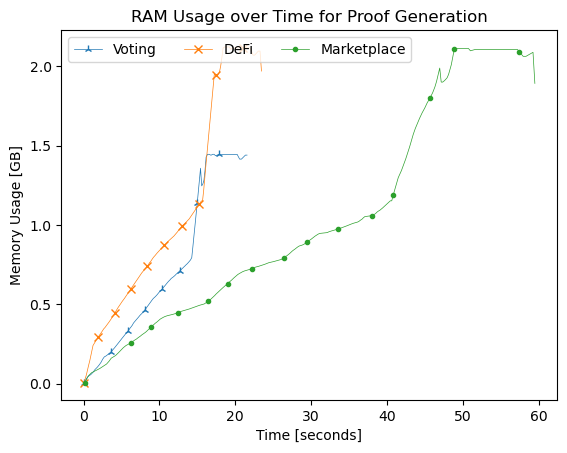

In [61]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


path = "../Benchmark/{}/{}/results/{}_formated.txt"
use_case = ["Voting", "DeFi", "Marketplace"]
value_checks = ["2","4","6","8"]


max_all = []
avg_all = []

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [GB]")

#measurements = ["compilation", "witness", "setup", "proof"]
measurements = ["proof1"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index2, usecase in enumerate(use_case):
            

        df1 = pd.read_csv(path.format(usecase, 2 , measure), header=None)
        time = df1[0]
        memory = round(df1[1] * 1024,3)

        plt.plot([t/1000 for t in time], memory*1e-9, linestyle="-", marker=marker[index2], linewidth=0.5, markevery=15, label=usecase)


with PdfPages("Memory_proof_gen_overtime_2.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncols=3)
    plt.title('RAM Usage over Time for Proof Generation')
    pdf.savefig(bbox_inches="tight")
    plt.show()

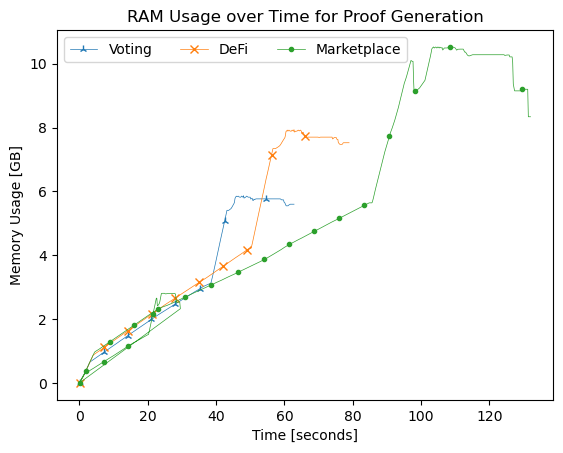

In [64]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


path = "../Benchmark/{}/{}/results/{}_formated.txt"
use_case = ["Voting", "DeFi", "Marketplace"]
value_checks = ["2","4","6","8"]


max_all = []
avg_all = []

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [GB]")

#measurements = ["compilation", "witness", "setup", "proof"]
measurements = ["proof1"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index2, usecase in enumerate(use_case):
            

        df1 = pd.read_csv(path.format(usecase, 8 , measure), header=None)
        time = df1[0]
        memory = round(df1[1] * 1024,3)

        plt.plot([t/1000 for t in time], memory*1e-9, linestyle="-", marker=marker[index2], linewidth=0.5, markevery=50, label=usecase)


with PdfPages("Memory_proof_gen_overtime_8.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncols=3)
    plt.title('RAM Usage over Time for Proof Generation')
    pdf.savefig(bbox_inches="tight")
    plt.show()